In [ ]:
# 로지스틱 회귀(Logistis Rrgression)
from sklearn.linear_model import LogisticRegression

# titanic data
# Kaggle train.csv
import pandas as pd
df = pd.read_csv("train.csv")
df_tt = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].copy()
X = df_tt.iloc[:, 1 :]
y = df_tt.iloc[:, 0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

l_r = LogisticRegression(solver="lbfgs", C=1.0, max_iter=100)
#l_r.fit(X_train, y_train)
# mael, female 데이터를 수치 데이터로 변환할 필요가 있다
# Sex Feature가 male이면 0, female이면 1
# 수치형 데이터 학습할 때 (레이블 인코딩)
# Lable Encoding -> Gender 컬럼 male이면 female 1
# One-Hot Encoding
# -> male 컬럼만들어서 male이면 1, female이면 0
# -> female 컬럼만들어서 female이면 1, male이면 0

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [ ]:
# One-Hot Encoding
X_exam = X.copy()
# 1) male 컬럼 만들어서 Sex male이면 1, 아니면 0
# 2) female 컬럼 만들어서 Sex female이면1, 아니면 0
# df.apply()
# 우리의 One-Hot Encoding
X_exam["male"] = X_exam["Sex"].apply(lambda x : 1 if x == "male" else 0)
X_exam["female"] = X_exam["Sex"].apply(lambda x : 1 if x == "female" else 0)
X_exam

X_exam2 = X.copy()
# X_exam2는 DataFrame이다
X_exam2 = pd.get_dummies(X_exam2, dtype=int)
X_exam2 = X_exam2.dropna()

X_train, X_test, y_train, y_test = train_test_split(X_exam2, y, random_state=20)
l_r.fir(X_train, y_train)

# 결측치 값 지우기 실패.. 아래에서 계속

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
889,1,26.0,0,0,30.0000,0,1


In [ ]:
# 새로운 마음으로 출발
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("train.csv")

df_tt = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].copy()
df_tt = df_tt.dropna() # 결측치 제거
df_tt = pd.get_dummies(df_tt, dtype=int)
X = df_tt.iloc[:, 1:]
y = df_tt.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

from sklearn.linear_model import LogisticRegression
l_r = LogisticRegression(solver="lbfgs", C=1.0, max_iter=200)

l_r.fit(X_train, y_train)

# 학습한 결과를 평가!!
from sklearn.metrics import accuracy_score    # 정확도!

y_pred = l_r.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy    #0.8156424581005587
print(f"정확도 : {accuracy * 100 : .2f}%")

# 혼돈 행렬(오차 행렬)
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_pred, labels=[1, 0])
# TP FN [54, 23]
# FP TN [11, 91]
[[TP, FN], [FP, TN]] = c_m

# 1) 정확도(Accuracy) : 얼마나 정답을 맞췄는지
# 생존한 사람을 생존했는지, 사망한 사람을 사망했는지 예측
#   분자 : TP + TN
#   분모 : TP + FN + FP + TN
accuracy = (TP + TN) / (TP + FN + FP + TN)

# 2) 재현율(Recall) : 실제 정답을 얼마나 잘 맞췄는지
# 생존한 사람을 얼마나 잘 맞췄는지
# 분자 : TP
# 분모 : TP + FN
recall = (TP) / (TP + FN)
recall

# 3) 정밀도 : 정답이라고 예측한 것 중에 맞춘 비율
# 생존했다고 예측한 것 중에 맞춘 비율
# 분자 : TP
# 분모 : TP + FP
precision = (TP) / (TP + FP)
precision

# <해석>

# 재현율이 높다 -> 정확도가 낮더라도 암환자는 잘 찾아냄, 생존한 사람은 잘 찾아냄
#   -> 진짜 정답을 틀리면 안되는 카테고리, 의료, 재난 등

# 정밀도가 높다 -> 암환자로 분류한 것은 암환자일 확률이 높다 (예. 타이타닉 생존이라고 분류한 것은 생존했을 가능성이 높다)
#   -> 분류기에 쓰인다(..?)

# 4) f1 score : recall, precision의 조화 평균
# 분자 : 2 x recall x precision
# 분모 : recall + precision
f1_score = (2 * recall * precision) / (recall + precision)

print(f"정확도 : {accuracy : .2f}")
print(f"재현율 : {recall : .2f}")
print(f"정밀도 : {precision : .2f}")
print(f"f1_score : {f1_score : .2f}")

print()
# 라이브러리에서 실제값과 똑같은지 확인
from sklearn.metrics import recall_score
recall_s = recall_score(y_test, y_pred)
print(f"재현율(라이브러리 버전) : {recall_s : .2f}")

from sklearn.metrics import precision_score
precision_s = precision_score(y_test, y_pred)
print(f"정밀도(라이브러리 버전) : {precision_s : .2f}")

from sklearn.metrics import f1_score
f1_score_s = f1_score(y_test, y_pred)
print(f"f1_score(라이브러리 버전) : {f1_score_s : .2f}")

print()

# 전체 한 눈에 보기
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# 지지도(support)는 skip함.

정확도 :  81.01%
정확도 :  0.81
재현율 :  0.70
정밀도 :  0.83
f1_score :  0.76

재현율(라이브러리 버전) :  0.70
정밀도(라이브러리 버전) :  0.83
f1_score(라이브러리 버전) :  0.76

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       102
           1       0.83      0.70      0.76        77

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



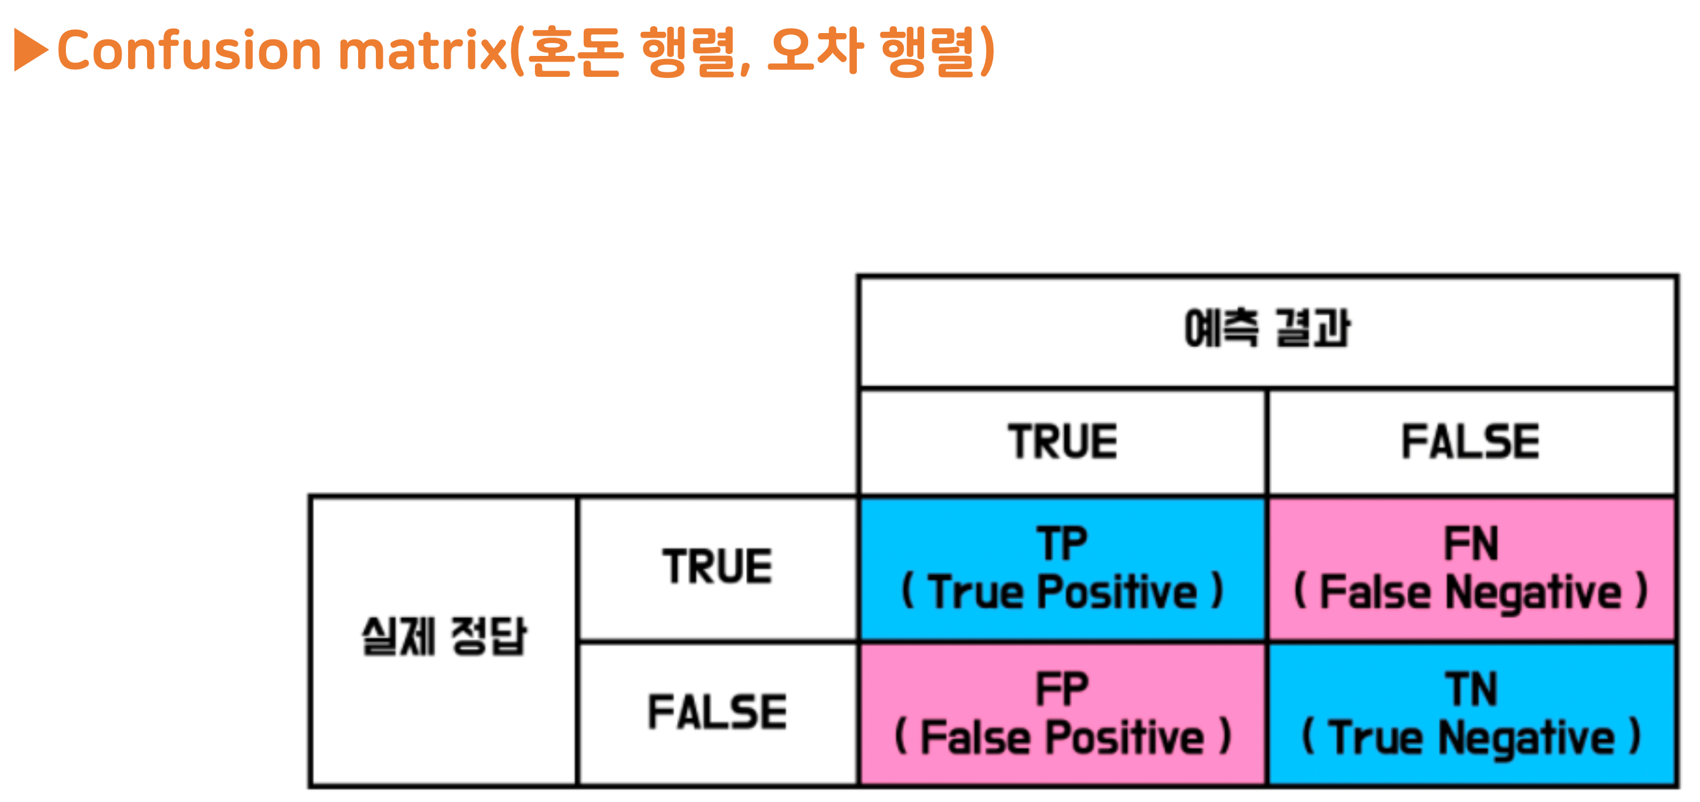

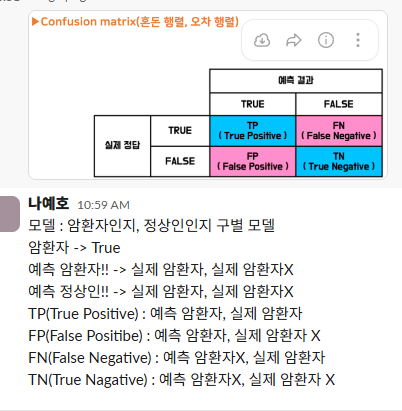

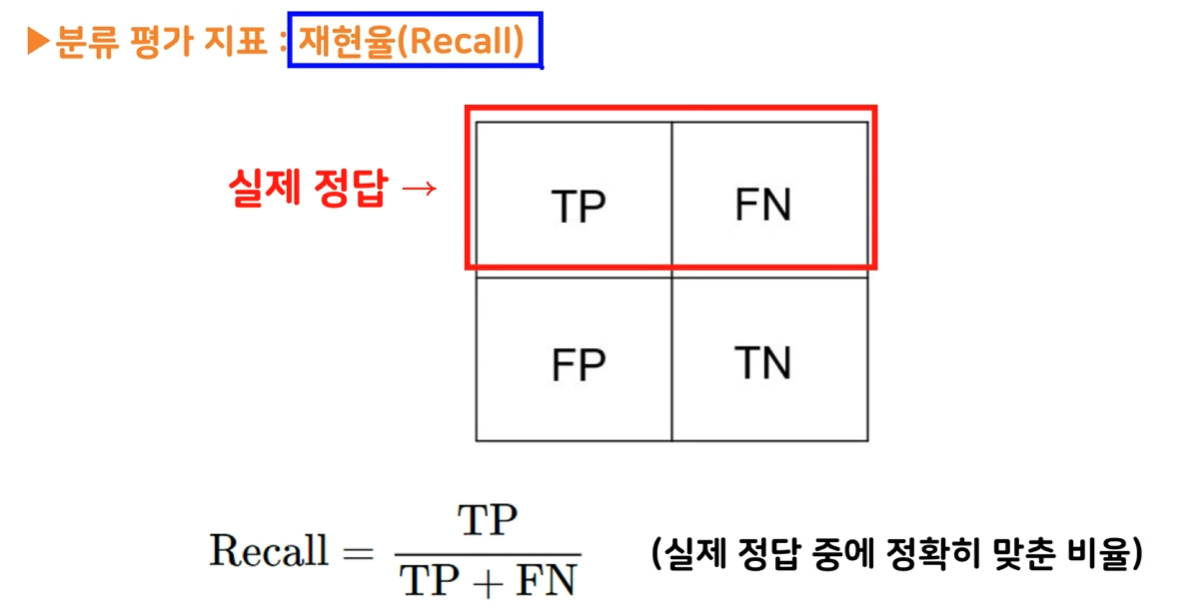


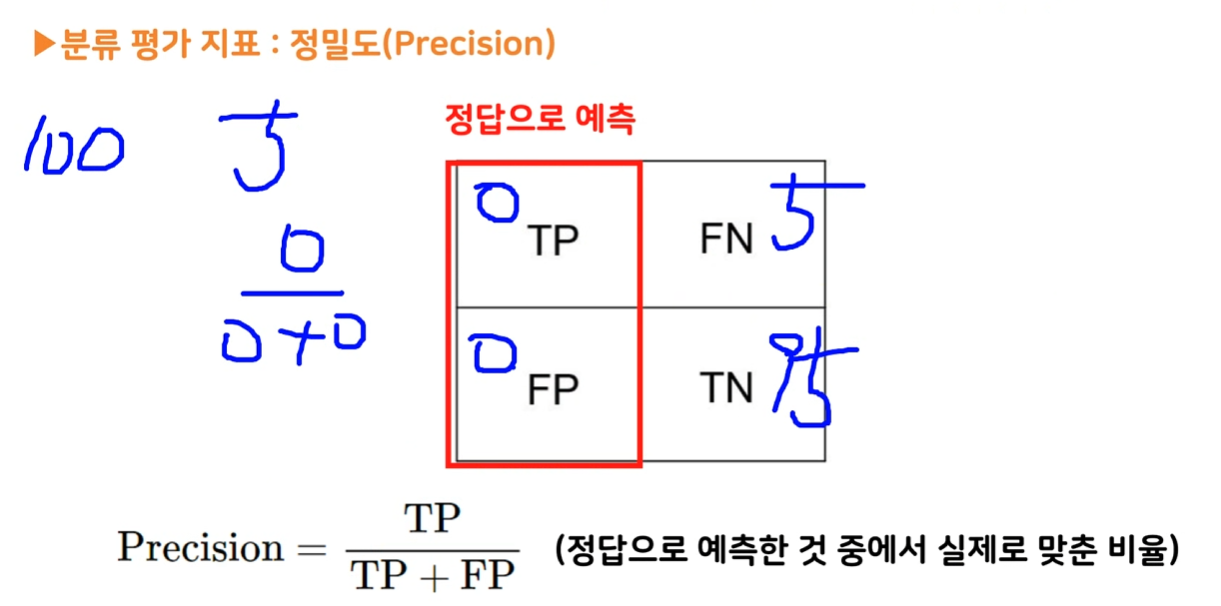

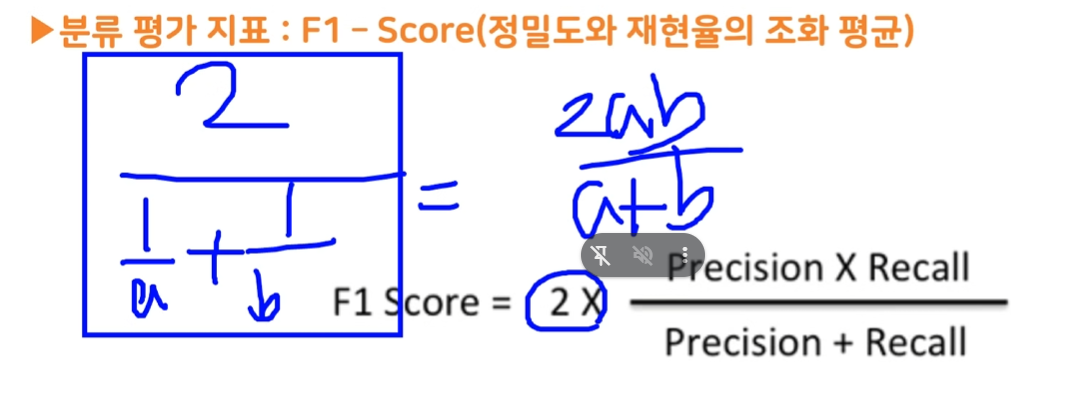

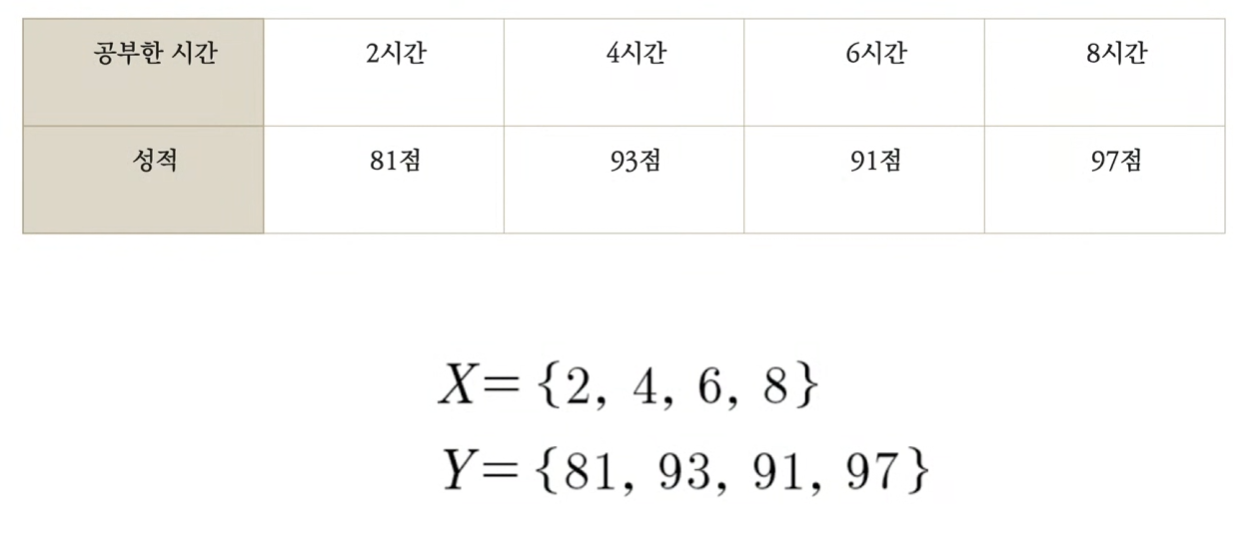

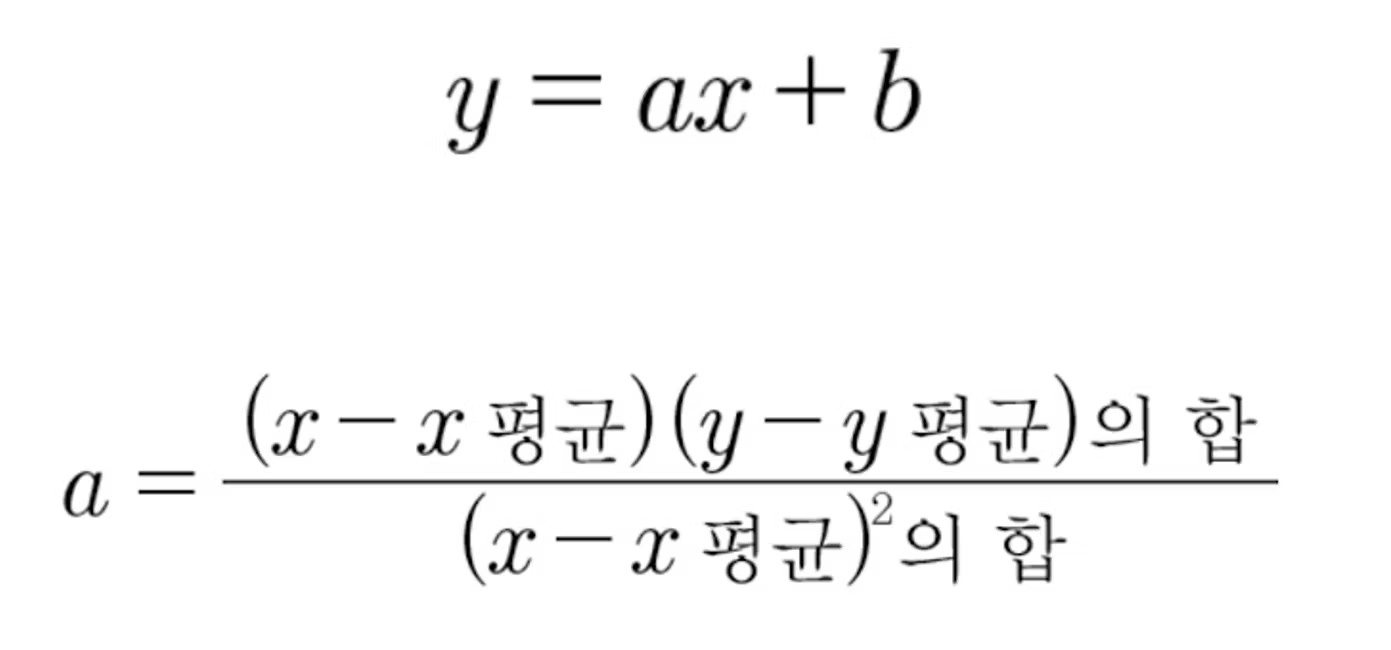

np.float64(85.9)

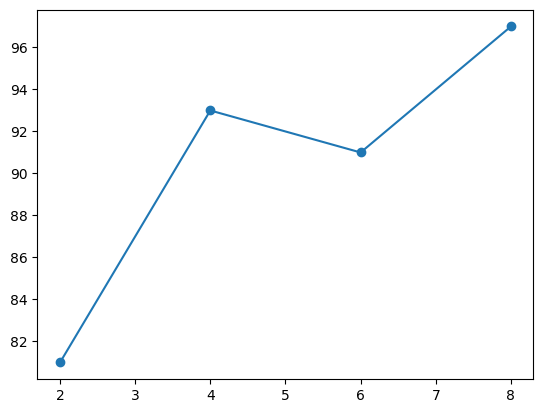

In [ ]:
# 오차를 수정해서 선형 회귀 W, b를 구해보자
# X : 공부한 시간, y: 성적
# 3시간 공부하면 몇 점이 ?
import numpy as np
X = np.array([2, 4, 6, 8])
y= np.array([81, 93, 91, 97])
# y와 X의 관계?
import matplotlib.pyplot as plt
plt.plot(X, y, marker = "o")
# plt.show()

# y = ax + b
X_mean = X.mean()
y_mean = y.mean()
분자 = np.sum((X - X_mean) * (y - y_mean))
분모 = np.sum((X - X_mean) ** 2)
a = 분자 / 분모 # 2.3
b = y_mean - a * X_mean # 79, b = y평균 - a * x평균
def model(X_input):
    return a * X_input + b



# a, b를 구하기 위해
# a = 3, b = 50 -> 내 맘대로 정한 이후에
# 실제 데이터 -> 실제값(y_test) 예측값(y_pred) 사이의 차이를 보고
# 차이를 줄이는 방향으로 a, b를 수정해보자

# MAE(절댓값 차이 오차), MSE(제곱 차이 평균), RMSE(제곱 차이 평균을 루트)
def model_custom(X_input):
    a, b = 3, 50
    return a * X_input + b

# X를 model로 예측한 MSE
def MSE_model(X, y):
    return np.average((model(X) - y) ** 2)

def MSE_model_custom(X, y):
    return np.average((model_custom(X) - y) ** 2)

MSE_model_custom(X, y)


In [68]:
# 학습 (1000번 학습해보자)
# 딥러닝스러운 첫 번째 코드

# 경사 하강법
# 편미분 값의 기울기를 보고 오차를 수정해나가는 방식
a, b = 0, 0   # 초반 값 모름
lr = 0.03     # 학습률(learning rate)
epochs = 1000 # 학습 진행 횟수
n = len(X)
for i in range(1, epochs + 1):
    diff_a = (-2 / n) * sum(x_i * (y_i - (a * x_i + b)) for x_i, y_i in zip(X, y))
    diff_b = (-2 / n) * sum((y_i - (a * x_i + b)) for x_i, y_i in zip(X, y))
    # 편미분 값의 기울기 양수 -> 음의 방향, 음수 -> 양의 방향
    a = a - lr * diff_a
    b = b - lr * diff_b
    if i % 100 == 0:
        print(f"a, b : {a, b}")

a, b : (np.float64(7.12075366611052), np.float64(50.231795437463965))
a, b : (np.float64(4.113643046202842), np.float64(68.17695394091768))
a, b : (np.float64(2.9823207314587843), np.float64(74.9282016827369))
a, b : (np.float64(2.5566996750287507), np.float64(77.4681261221693))
a, b : (np.float64(2.3965744115952368), np.float64(78.4236852135748))
a, b : (np.float64(2.3363327961904123), np.float64(78.78318141078128))
a, b : (np.float64(2.3136689632088885), np.float64(78.91842947337439))
a, b : (np.float64(2.3051424766270814), np.float64(78.96931189877239))
a, b : (np.float64(2.3019346797160813), np.float64(78.98845465885884))
a, b : (np.float64(2.300727856609813), np.float64(78.99565646303506))


In [ ]:
# 다중 선형 회귀
# 강력한 경사하강법 사용하여
X1 = X.copy()               # 학습 시간
X2 = np.array([0, 4, 2, 3]) # 과외 횟수
print(X1, X2, y)
# y = a1 * X1 + a2 * X2 + b
a1, a2, b = 0, 0, 0
lr = 0.01
epochs = 1000

for i in range(1, epochs + 1):
    y_pred = a1 * X1 + a2 * X2 + b # 예측값
    error = y - y_pred             # 오차
    diff_a1 = (-2 / n) * sum(x_i * (e) for x_i, e in zip(X1, error))
    diff_a2 = (-2 / n) * sum(x_i * (e) for x_i, e in zip(X2, error))
    diff_b = (-2 / n) * sum(e for e in error)

    if i % 100 == 0:
        print(f"{a1 :.2f} * x1 + {a2 :.2f} * x2 + {b :.2f}")

    a1 = a1 - lr * diff_a1
    a2 = a2 - lr * diff_a2
    b = b - lr * diff_b

# 알아야 하는 포인트 ☆★
# 1) 선형 회귀에서 오차를 수정할 때, 편미분 한 값의 반댓방향으로 이동한다
#   -> 경사하강법이라고 부른다
# 얼마나 가중치를 두고 이동할건지 -> 학습률(Learning Rate)

[2 4 6 8] [0 4 2 3] [81 93 91 97]
9.56 * x1 + 5.04 * x2 + 22.57
7.36 * x1 + 4.31 * x2 + 37.62
5.77 * x1 + 3.76 * x2 + 48.57
4.60 * x1 + 3.36 * x2 + 56.55
3.76 * x1 + 3.07 * x2 + 62.35
3.14 * x1 + 2.85 * x2 + 66.57
2.70 * x1 + 2.70 * x2 + 69.64
2.37 * x1 + 2.59 * x2 + 71.88
2.13 * x1 + 2.50 * x2 + 73.51
1.96 * x1 + 2.44 * x2 + 74.69


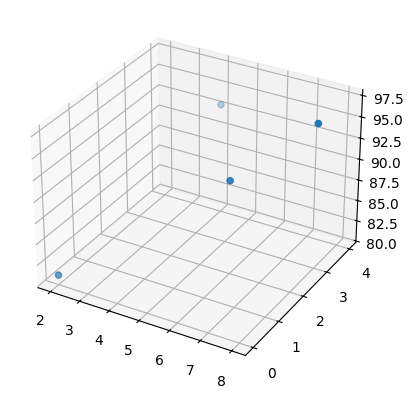

In [75]:
# 그려보자
# 3차원 그릴 캔버스
fig = plt.figure()
graph = fig.add_subplot(111, projection="3d")
graph.scatter(X1, X2, y)
plt.show()

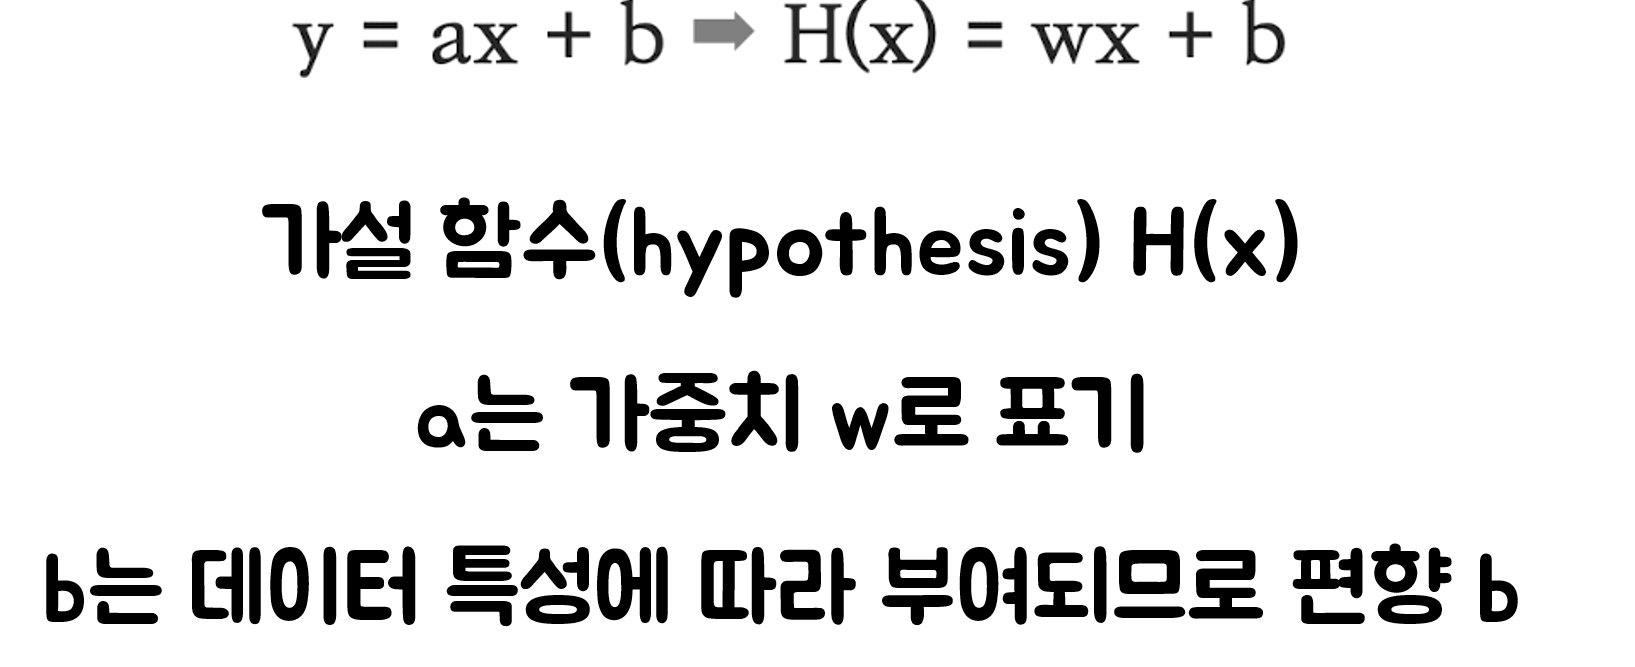

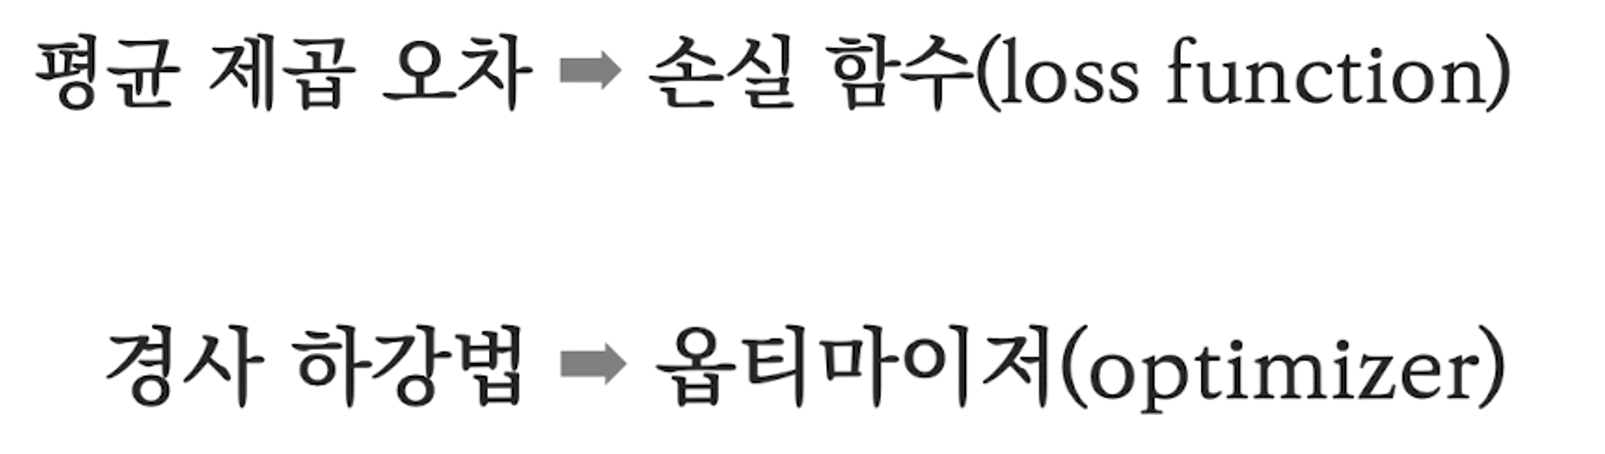

In [78]:
# 첫 딥 러닝
%pip install tensorflow
%pip install keras

   ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
   - -------------------------------------- 9.4/331.7 MB 83.4 MB/s eta 0:00:04
   - -------------------------------------- 9.4/331.7 MB 83.4 MB/s eta 0:00:04
   -- ------------------------------------- 16.8/331.7 MB 27.1 MB/s eta 0:00:12
   -- ------------------------------------- 16.8/331.7 MB 27.1 MB/s eta 0:00:12
   --- ------------------------------------ 25.2/331.7 MB 24.5 MB/s eta 0:00:13
   --- ------------------------------------ 32.0/331.7 MB 25.4 MB/s eta 0:00:12
   ----- ---------------------------------- 44.6/331.7 MB 30.5 MB/s eta 0:00:10
   -------- ------------------------------- 66.8/331.7 MB 39.8 MB/s eta 0:00:07
   ---------- ----------------------------- 84.9/331.7 MB 45.9 MB/s eta 0:00:06
   ----------- --------------------------- 101.7/331.7 MB 49.2 MB/s eta 0:00:05
   ----------- --------------------------- 101.7/331.7 MB 49.2 MB/s eta 0:00:05
   ------------ -------------------------- 106.4/33

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
data = np.loadtxt("https://github.com/nayeho/robot/raw/refs/heads/main/data/ThoraricSurgery3.csv", delimiter=",")
data[0:5, 16]   # 17번째 컬럼이 생존여부 1 : 생존 / 0 : 사망
X = data[:, :16]
y = data[:, 16]

model = Sequential()    # 쌓을 층들이 존재하는 공간
model.add(Dense(30, input_dim=16, activation="relu"))
model.add(Dense(20, input_dim=30, activation="relu"))
model.add(Dense(50, input_dim=50, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 딥 러닝 모델을 설정!!
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X, y, epochs=100, batch_size=16)

# 첫 딥 러닝 끝


Epoch 1/100


c:\Users\kccistc\AppData\Local\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7532 - loss: 0.6831   
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4424 
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4352 
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4410 
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4336 
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4285 
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.4229 
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4243 
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4321 
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4274 
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.4234 
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

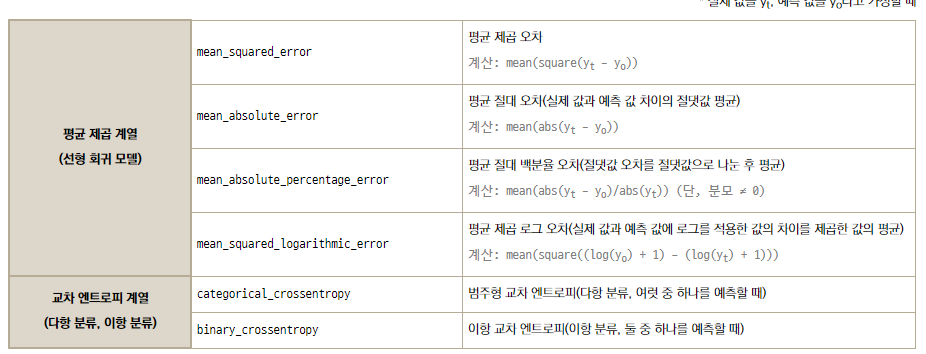

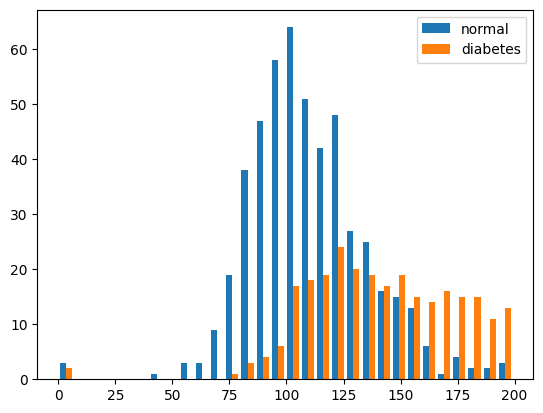

In [3]:
# 두번째 딥러닝
# 다른 데이터를 통해 딥 러닝 해보자

import pandas as pd
data_indians = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/data/pima-indians-diabetes3.csv")
data_indians
# 정상과 당뇨 여부를 딥 러닝 모델
data_indians["diabetes"].value_counts() # 1: 당뇨 / 0 : 당뇨 아님
data_indians.describe() # 수치형 데이터 통계 정보 제공
data_indians.corr() # 상관 관계 계수 확인

# 히스토그램 시각화
import matplotlib.pyplot as plt
his_x_1 = data_indians.plasma[data_indians.diabetes == 0]
his_x_2 = data_indians.plasma[data_indians.diabetes == 1]
plt.hist(x=[his_x_1, his_x_2], bins=30, label=["normal", "diabetes"])
plt.legend()

In [6]:
# 두 번째 딥 러닝
X = data_indians.iloc[:, :8]
y = data_indians.iloc[:, 8]
model = Sequential()
model.add(Dense(64, input_dim=8, activation="relu", name="layer_1"))
model.add(Dense(92, input_dim=64, activation="relu", name="layer_2"))
model.add(Dense(1, input_dim=92, activation="sigmoid", name="layer_3"))
# model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X, y, epochs=1000, batch_size=16, verbose=False)

In [5]:
# 평가 지표
np.average(history.history["accuracy"]) # 100번 학습 동안 정확도 평균
np.max(history.history["accuracy"])     # 100번 학습 동안 최고 정확도

np.float64(0.9986979365348816)

In [11]:
# 세 번째 딥러닝
import pandas as pd
df = pd.read_csv("train.csv")
df_tt = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].copy()

# 1) 전처리 : 결측치(NaN) dropna
df_tt = df_tt.dropna()
# 2) 범주형 데이터인 Sex -> One-Hot Encoding (hint : pd.get_dummies() 활용)
df_tt = pd.get_dummies(df_tt, dtype=int)
# 3) X, y를 iloc 슬라이싱
# -> y : Survived, X : 나머지 컬럼
X = df_tt.iloc[:, 1:]
y = df_tt.iloc[:, 0]
# 4) Sequential() 통해 층을 쌓을 model 인스턴스 만들기
model = Sequential()
# 5) Dense()를 통해 원하는 만큼 층 쌓기
model.add(Dense(30, input_dim=7, activation="relu"))  # 1층
model.add(Dense(20, input_dim=30, activation="relu")) # 2층
model.add(Dense(10, input_dim=20, activation="relu"))
# 6) 단, 마지막 층은 output 1, 활성화 함수 sigmoid로 해주세요
model.add(Dense(1, input_dim=10, activation="sigmoid"))
# 7) 생존 혹은 사망 -> 이항분류(binary_crossentropy) 학습
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 8) epochs, batch_size 원하는 만큼 파라미터 설정

c:\Users\kccistc\AppData\Local\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 9) 학습!!
history = model.fit(X, y, epochs=1000, batch_size=16, verbose=False)
# 10) 정확도도 확인해보세요
max(history.history["accuracy"])

0.8977590799331665

In [1]:
# Ctrl + Shift + Esc
# 작업관리자 GPU 확인
import tensorflow as tf
tf.__version__

'2.20.0'